In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 500)
df = pd.read_csv("elementsData.csv")
df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type
0,NaN,NaN,37605,0,0,0,0,0,3,3.4,NaN,0,Mesut,0.0,1,False,NaN,NaN,70,37605.jpg,2.9,Özil,2.1,False,NaN,a,1,3,53,0,0,0,0,0.0,7.6,Özil,1439,1,3,5,20,0,0,0,1,0,0,1,256,223.6,582.9,190.0,99.8,255,110,35,29,175,96,135,72
1,NaN,NaN,39476,0,0,0,0,0,2,3.1,NaN,0,Sokratis,0.0,2,False,NaN,NaN,50,39476.jpg,3.0,Papastathopoulos,0.6,False,NaN,a,1,3,57,0,0,0,0,0.0,11.4,Sokratis,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,144,53,296,106,224,65,234,74
2,NaN,NaN,41270,0,0,0,0,0,2,3.5,NaN,0,David,0.0,3,False,NaN,NaN,55,41270.jpg,2.8,Luiz Moreira Marinho,1.9,False,NaN,a,1,3,94,0,0,0,0,0.0,17.1,David Luiz,2809,2,1,8,42,0,0,0,5,2,0,10,494,701.6,106.7,211.0,102.1,50,18,222,61,161,32,130,35
3,NaN,NaN,54694,0,0,0,0,0,3,5.0,NaN,0,Pierre-Emerick,0.0,4,False,NaN,NaN,120,54694.jpg,5.7,Aubameyang,35.2,False,NaN,a,1,3,205,0,0,0,0,0.0,17.1,Aubameyang,3136,22,5,10,44,0,0,0,3,1,0,37,807,1006.0,479.6,1369.0,285.2,8,4,54,42,9,3,11,7
4,NaN,NaN,58822,0,0,0,0,0,2,3.1,NaN,0,Cédric,0.0,5,False,NaN,NaN,50,58822.jpg,2.9,Soares,0.5,False,NaN,a,1,3,61,0,0,0,0,0.0,12.2,Cédric,1553,1,1,4,20,0,0,0,1,0,0,3,286,349.0,218.9,118.0,68.7,182,68,158,34,223,64,202,59


In [170]:
from sklearn.model_selection import train_test_split

def massed(num,x,y,value):
    linr = LinearRegression()
    df_new = pd.DataFrame()
    for i in range(1,num):
        x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.6)
        linr.fit(x_train,y_train)
        som = linr.predict(x_test)
        value_df = pd.DataFrame(data = som, columns = ['value'], index = x_test.index.copy())
        df_out = pd.merge(df, value_df, how = 'left', left_index = True, right_index = True)
        new_res = pd.concat([df_new,df_out]).groupby(level=0).mean()
        df_new = new_res
    new_res = new_res.rename(columns = {'value':value})
    return new_res

In [171]:
x = pd.DataFrame({'brat':df["minutes"],'bpd':df['bps'],'ict':df['ict_index'],'pos':df['element_type']})#'Points':df["total_points"],"Pos":df["element_type"]
y = df[["total_points"]]

In [172]:
df_out = massed(50,x,y,"Predicted_Points")
df_out.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,form,id,in_dreamteam,now_cost,points_per_game,selected_by_percent,special,squad_number,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,Predicted_Points
0,NaN,NaN,37605,0,0,0,0,0,3,3.4,NaN,0,0.0,1,False,70,2.9,2.1,False,NaN,1,3,53,0,0,0,0,0.0,7.6,1439,1,3,5,20,0,0,0,1,0,0,1,256,223.6,582.9,190.0,99.8,255,110,35,29,175,96,135,72,65.790646
1,NaN,NaN,39476,0,0,0,0,0,2,3.1,NaN,0,0.0,2,False,50,3.0,0.6,False,NaN,1,3,57,0,0,0,0,0.0,11.4,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,144,53,296,106,224,65,234,74,59.043592
2,NaN,NaN,41270,0,0,0,0,0,2,3.5,NaN,0,0.0,3,False,55,2.8,1.9,False,NaN,1,3,94,0,0,0,0,0.0,17.1,2809,2,1,8,42,0,0,0,5,2,0,10,494,701.6,106.7,211.0,102.1,50,18,222,61,161,32,130,35,97.343251
3,NaN,NaN,54694,0,0,0,0,0,3,5.0,NaN,0,0.0,4,False,120,5.7,35.2,False,NaN,1,3,205,0,0,0,0,0.0,17.1,3136,22,5,10,44,0,0,0,3,1,0,37,807,1006.0,479.6,1369.0,285.2,8,4,54,42,9,3,11,7,197.387233
4,NaN,NaN,58822,0,0,0,0,0,2,3.1,NaN,0,0.0,5,False,50,2.9,0.5,False,NaN,1,3,61,0,0,0,0,0.0,12.2,1553,1,1,4,20,0,0,0,1,0,0,3,286,349.0,218.9,118.0,68.7,182,68,158,34,223,64,202,59,60.511635


In [192]:
x = pd.DataFrame({'new':df['selected_by_percent'],'brat':df["minutes"],'bpd':df['bps'],'ict':df['ict_index'],'pos':df['element_type']})#'Points':df["total_points"],"Pos":df["element_type"]
y = df[["now_cost"]]
cost_df = massed(10,x,y,'Predicted_Cost')
cost_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,form,id,in_dreamteam,now_cost,points_per_game,selected_by_percent,special,squad_number,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,Predicted_Cost
0,NaN,NaN,37605,0,0,0,0,0,3,3.4,NaN,0,0.0,1,False,70,2.9,2.1,False,NaN,1,3,53,0,0,0,0,0.0,7.6,1439,1,3,5,20,0,0,0,1,0,0,1,256,223.6,582.9,190.0,99.8,255,110,35,29,175,96,135,72,58.387572
1,NaN,NaN,39476,0,0,0,0,0,2,3.1,NaN,0,0.0,2,False,50,3.0,0.6,False,NaN,1,3,57,0,0,0,0,0.0,11.4,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,144,53,296,106,224,65,234,74,47.731146
2,NaN,NaN,41270,0,0,0,0,0,2,3.5,NaN,0,0.0,3,False,55,2.8,1.9,False,NaN,1,3,94,0,0,0,0,0.0,17.1,2809,2,1,8,42,0,0,0,5,2,0,10,494,701.6,106.7,211.0,102.1,50,18,222,61,161,32,130,35,49.393761
3,NaN,NaN,54694,0,0,0,0,0,3,5.0,NaN,0,0.0,4,False,120,5.7,35.2,False,NaN,1,3,205,0,0,0,0,0.0,17.1,3136,22,5,10,44,0,0,0,3,1,0,37,807,1006.0,479.6,1369.0,285.2,8,4,54,42,9,3,11,7,93.779006
4,NaN,NaN,58822,0,0,0,0,0,2,3.1,NaN,0,0.0,5,False,50,2.9,0.5,False,NaN,1,3,61,0,0,0,0,0.0,12.2,1553,1,1,4,20,0,0,0,1,0,0,3,286,349.0,218.9,118.0,68.7,182,68,158,34,223,64,202,59,49.840875


In [193]:
new_df = pd.DataFrame({"Code":df["code"],"Name":df["web_name"]})
fin = pd.DataFrame()
fin = pd.concat([new_df,df_out,cost_df],axis = 1)
fin.head()

,Code,Name,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,form,id,in_dreamteam,now_cost,points_per_game,selected_by_percent,special,squad_number,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,Predicted_Points,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,form,id,in_dreamteam,now_cost,points_per_game,selected_by_percent,special,squad_number,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,Predicted_Cost
0,37605,Özil,NaN,NaN,37605,0,0,0,0,0,3,3.4,NaN,0,0.0,1,False,70,2.9,2.1,False,NaN,1,3,53,0,0,0,0,0.0,7.6,1439,1,3,5,20,0,0,0,1,0,0,1,256,223.6,582.9,190.0,99.8,255,110,35,29,175,96,135,72,65.790646,NaN,NaN,37605,0,0,0,0,0,3,3.4,NaN,0,0.0,1,False,70,2.9,2.1,False,NaN,1,3,53,0,0,0,0,0.0,7.6,1439,1,3,5,20,0,0,0,1,0,0,1,256,223.6,582.9,190.0,99.8,255,110,35,29,175,96,135,72,58.387572
1,39476,Sokratis,NaN,NaN,39476,0,0,0,0,0,2,3.1,NaN,0,0.0,2,False,50,3.0,0.6,False,NaN,1,3,57,0,0,0,0,0.0,11.4,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,144,53,296,106,224,65,234,74,59.043592,NaN,NaN,39476,0,0,0,0,0,2,3.1,NaN,0,0.0,2,False,50,3.0,0.6,False,NaN,1,3,57,0,0,0,0,0.0,11.4,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,144,53,296,106,224,65,234,74,47.731146
2,41270,David Luiz,NaN,NaN,41270,0,0,0,0,0,2,3.5,NaN,0,0.0,3,False,55,2.8,1.9,False,NaN,1,3,94,0,0,0,0,0.0,17.1,2809,2,1,8,42,0,0,0,5,2,0,10,494,701.6,106.7,211.0,102.1,50,18,222,61,161,32,130,35,97.343251,NaN,NaN,41270,0,0,0,0,0,2,3.5,NaN,0,0.0,3,False,55,2.8,1.9,False,NaN,1,3,94,0,0,0,0,0.0,17.1,2809,2,1,8,42,0,0,0,5,2,0,10,494,701.6,106.7,211.0,102.1,50,18,222,61,161,32,130,35,49.393761
3,54694,Aubameyang,NaN,NaN,54694,0,0,0,0,0,3,5.0,NaN,0,0.0,4,False,120,5.7,35.2,False,NaN,1,3,205,0,0,0,0,0.0,17.1,3136,22,5,10,44,0,0,0,3,1,0,37,807,1006.0,479.6,1369.0,285.2,8,4,54,42,9,3,11,7,197.387233,NaN,NaN,54694,0,0,0,0,0,3,5.0,NaN,0,0.0,4,False,120,5.7,35.2,False,NaN,1,3,205,0,0,0,0,0.0,17.1,3136,22,5,10,44,0,0,0,3,1,0,37,807,1006.0,479.6,1369.0,285.2,8,4,54,42,9,3,11,7,93.779006
4,58822,Cédric,NaN,NaN,58822,0,0,0,0,0,2,3.1,NaN,0,0.0,5,False,50,2.9,0.5,False,NaN,1,3,61,0,0,0,0,0.0,12.2,1553,1,1,4,20,0,0,0,1,0,0,3,286,349.0,218.9,118.0,68.7,182,68,158,34,223,64,202,59,60.511635,NaN,NaN,58822,0,0,0,0,0,2,3.1,NaN,0,0.0,5,False,50,2.9,0.5,False,NaN,1,3,61,0,0,0,0,0.0,12.2,1553,1,1,4,20,0,0,0,1,0,0,3,286,349.0,218.9,118.0,68.7,182,68,158,34,223,64,202,59,49.840875


In [194]:
priced = pd.DataFrame({"Name":fin["Name"],
                       "Postion": df["element_type"],
                       "Cost":df['now_cost'],
                       "Points":df["total_points"],
                       "Predicted Points":fin["Predicted_Points"].round(),
                       "Predicted Cost":fin["Predicted_Cost"].round(),
                       "Cost Diff":(fin["Predicted_Cost"] - df['now_cost']).round(),
                       "Point Diff":(fin["Predicted_Points"]-df["total_points"]).round()})

In [223]:
presort=priced.sort_values(by=["Predicted Points"],ascending=False)

In [224]:
presort

,Name,Postion,Cost,Points,Predicted Points,Predicted Cost,Cost Diff,Point Diff
274,De Bruyne,3,115,251,268.0,126.0,11.0,17.0
256,Salah,3,120,233,211.0,109.0,-11.0,-22.0
261,Alexander-Arnold,2,75,210,211.0,109.0,34.0,1.0
3,Aubameyang,3,120,205,197.0,94.0,-26.0,-8.0
374,Ings,4,85,198,195.0,105.0,20.0,-3.0
203,Vardy,4,100,210,195.0,93.0,-7.0,-15.0
471,Jiménez,4,85,194,193.0,96.0,11.0,-1.0
278,Sterling,3,115,204,193.0,94.0,-21.0,-11.0
27,Willian,3,80,168,186.0,90.0,10.0,18.0
253,Mané,3,120,221,186.0,89.0,-31.0,-35.0


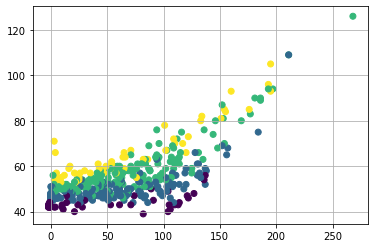

In [227]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
x,y = presort["Predicted Points"],presort["Predicted Cost"]
scat=ax1.scatter(x,y,c=presort["Postion"])
ax1.grid(True)
plt.show()

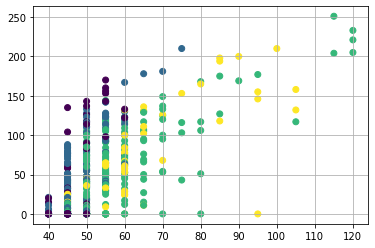

In [228]:
fig, ax1 = plt.subplots()
x,y = presort["Cost"],presort["Points"]
scat=ax1.scatter(x,y,c=presort["Postion"])
ax1.grid(True)
plt.show()

In [226]:
presort.to_csv("Predict_Values.csv",na_rep = "Unknown",sep=',',index = False)